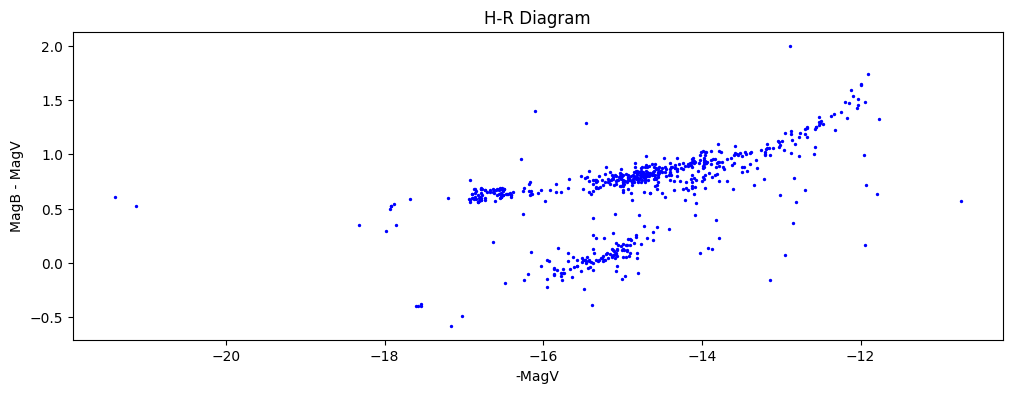

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset, skipping metadata rows and using the correct delimiter
file_path = '/content/simbad.csv'
data = pd.read_csv(file_path, skiprows=7, sep=';', header=0)
data = data.drop(index=0)
# Remove spaces from each column name
data.columns = data.columns.str.replace(' ', '', regex=True)
data = data[['MagB', 'MagV']]

# Convert the columns to numeric, forcing errors to NaN
data['MagB'] = pd.to_numeric(data['MagB'].str.strip(), errors='coerce')
data['MagV'] = pd.to_numeric(data['MagV'].str.strip(), errors='coerce')

# Remove rows with NaN values in 'MagB' or 'MagV'
data = data.dropna()

# Create new columns
data['MagB - MagV'] = data['MagB'] - data['MagV']
data['-MagV'] = -data['MagV']

data.head(10)

# Create the scatter plot
plt.figure(figsize=(12, 4))
plt.scatter(data['-MagV'], data['MagB - MagV'], color='blue', s=2)
plt.title('Scatter Plot of -MagV vs. MagB - MagV')
plt.xlabel('-MagV')
plt.ylabel('MagB - MagV')
plt.title('H-R Diagram')
#plt.grid()
plt.show()

In [102]:
data.shape

(620, 4)